<a href="https://colab.research.google.com/github/Amityadav9/IMDBreview/blob/main/MyIMDBreview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history,metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric],'')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric,'val_'+metric])
  plt.show()

In [ ]:
dataset, info = tfds.load('imdb_reviews/subwords8k',with_info= True , as_supervised = True)
train_dataset , test_dataset = dataset['train'],dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3KNMZJ/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3KNMZJ/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3KNMZJ/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
encoder = info.features['text'].encoder
encoder

<SubwordTextEncoder vocab_size=8185>

In [ ]:
print('Vocabulary Size : {}'.format(encoder.vocab_size))

Vocabulary Size : 8185


In [ ]:
sample_string = 'Hello Maggie, How are You doin,are Maggie hello ?'
encoded_string = encoder.encode(sample_string)
print ('Encoded String is {}'.format(encoded_string))
decoded_string = encoder.decode(encoded_string)
print ('Decoded String is : ""{}"'.format(decoded_string))


Encoded String is [4025, 222, 2853, 4692, 2, 693, 29, 298, 7554, 8039, 7973, 29, 2853, 4692, 7961, 3618, 8040, 7961, 7992]
Decoded String is : ""Hello Maggie, How are You doin,are Maggie hello ?"


In [ ]:
for index in encoded_string:
  print('{}------>{}'.format(index,encoder.decode([index])))

4025------>Hell
222------>o 
2853------>Mag
4692------>gie
2------>, 
693------>How 
29------>are 
1162------>You
7961------> 
7992------>?


In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64



In [ ]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)

test_dataset =test_dataset.padded_batch(BATCH_SIZE)

In [ ]:
Vocab_size = encoder.vocab_size

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(Vocab_size,64),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)                    
])

In [ ]:
model.compile(optimizer='Adam',
                loss= tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy']
)

In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 45s 116ms/step - loss: 0.5794 - accuracy: 0.6599 - val_loss: 0.4553 - val_accuracy: 0.7953
Epoch 2/10
391/391 [==============================] - 45s 115ms/step - loss: 0.3981 - accuracy: 0.8252 - val_loss: 0.4469 - val_accuracy: 0.8193
Epoch 3/10
391/391 [==============================] - 45s 115ms/step - loss: 0.3254 - accuracy: 0.8656 - val_loss: 0.3898 - val_accuracy: 0.8432
Epoch 4/10
391/391 [==============================] - 45s 115ms/step - loss: 0.2569 - accuracy: 0.8987 - val_loss: 0.4001 - val_accuracy: 0.8266
Epoch 5/10
391/391 [==============================] - 45s 115ms/step - loss: 0.2137 - accuracy: 0.9175 - val_loss: 0.4239 - val_accuracy: 0.8370
Epoch 6/10
391/391 [==============================] - 45s 115ms/step - loss: 0.3863 - accuracy: 0.8068 - val_loss: 0.5614 - val_accuracy: 0.7010
Epoch 7/10
391/391 [==============================] - 45s 115ms/step - loss: 0.4503 - accuracy: 0.7825 - val_loss: 0.5665 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print('Test Loss: {}'.format(test_loss))
print('Test Acc: {}'.format(test_acc))

391/391 [==============================] - 17s 44ms/step - loss: 0.5886 - accuracy: 0.8086
Test Loss: 0.5885677933692932
Test Acc: 0.8086400032043457


In [ ]:
def pad_to_size(vec, size):
  zeros = [0]* (size - len(vec))
  vec.extend(zeros)
  return vec

In [ ]:
def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions)

In [ ]:
sample_pred_text = ('I dont reccomend this movie, the plot was shallow, the intorduction was too long and there was no message in it.')
prediction = sample_predict(sample_pred_text,pad = False)
if prediction>1:
  print('Positive Review ---> {}'.format(prediction))
else:
  print('Negative Review ---> {}'.format(prediction))
#print(prediction)


Negative Review ---> [[-2.9430041]]


In [ ]:
sample_pred_text = ('I really liked the movie, which was based on a true story, I was able to feel the emotions of the characters, the plot was well built up. The acting was outstanding.')
prediction = sample_predict(sample_pred_text,pad = False)
#print(prediction)
if prediction>1:
  print('Positive Review ---> {}'.format(prediction))
else:
  print('Negative Review ---> {}'.format(prediction))

Positive Review ---> [[2.9581892]]


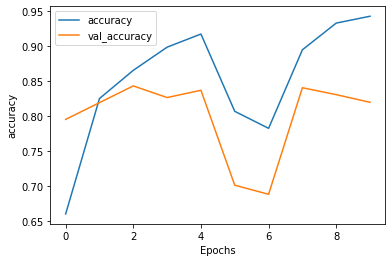

In [ ]:
plot_graphs(history,'accuracy')

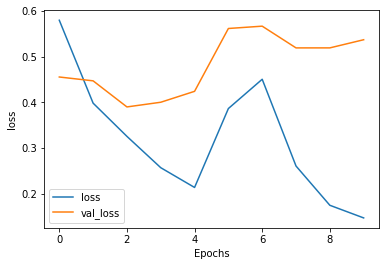

In [ ]:
plot_graphs(history,'loss')

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=5,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/5
391/391 [==============================] - 80s 205ms/step - loss: 0.5634 - accuracy: 0.6870 - val_loss: 0.5337 - val_accuracy: 0.7531
Epoch 2/5
391/391 [==============================] - 78s 201ms/step - loss: 0.4047 - accuracy: 0.8211 - val_loss: 0.4584 - val_accuracy: 0.7823
Epoch 3/5
391/391 [==============================] - 79s 203ms/step - loss: 0.4484 - accuracy: 0.7944 - val_loss: 0.4356 - val_accuracy: 0.7911
Epoch 4/5
391/391 [==============================] - 79s 202ms/step - loss: 0.3111 - accuracy: 0.8759 - val_loss: 0.4836 - val_accuracy: 0.7625
Epoch 5/5
391/391 [==============================] - 80s 205ms/step - loss: 0.2549 - accuracy: 0.9040 - val_loss: 0.3570 - val_accuracy: 0.8500


In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 32s 81ms/step - loss: 0.3684 - accuracy: 0.8452
Test Loss: 0.3684000074863434
Test Accuracy: 0.8452000021934509


In [ ]:
sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print(predictions)

[[-3.6854668]]


In [ ]:
sample_pred_text = ('I dont reccomend this movie, the plot was shallow, the intorduction was too long and there was no message in it.')
prediction = sample_predict(sample_pred_text,pad = True)*100
if prediction>1:
  print('Positive Review ---> {}'.format(prediction))
else:
  print('Negative Review ---> {}'.format(prediction))
#print(prediction)

Negative Review ---> [[-104.17372]]


In [ ]:
sample_pred_text = ('I really liked the movie, which was based on a true story, I was able to feel the emotions of the characters, the plot was well built up. The acting was outstanding.')
prediction = sample_predict(sample_pred_text,pad = True)*100
#print(prediction)
if prediction>1:
  print('Positive Review ---> {}'.format(prediction))
else:
  print('Negative Review ---> {}'.format(prediction))

Positive Review ---> [[304.39365]]
